In [2]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
G = nx.Graph()

In [4]:
G.name = "Cities"

In [5]:
G.add_node("Delhi", country="India", tz=5.5)
G.add_node("Mumbai", country="India", tz=5.5)
G.add_node("Austin", county="USA", tz=-6)
G.add_node("NYC", country="USA", tz=5.5)
G.add_node("Madrid", country="Spain", tz=1)

In [6]:
G.edges(data=True)

[]

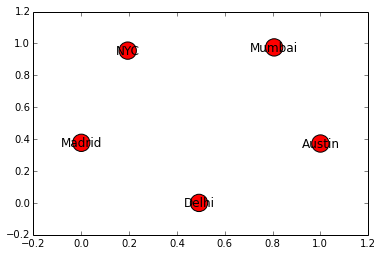

In [9]:
nx.draw_networkx(G)

## Write code to add all possible edges in G with attribute "tz_diff" as the absolute difference between the "tz" attributes of the nodes.

### Hint 1: Write a for loop on `G.nodes()`

### Hint 2: Use function `G.add_edge`

### Hint 3: Get the "tz" attribute of a node like this -> `G.node["NYC"]["tz"]`

### Hint 4: Use built-in `abs()` function to get the absolute value of a number.

In [9]:
for u in G.nodes():
    for v in G.nodes():
        if u != v:
            G.add_edge(u, v, tz_diff=abs(G.node[u]["tz"] - G.node[v]["tz"]))

### Better method

In [10]:
from itertools import combinations

In [19]:
print combinations(G.nodes(), 2)

In [22]:
for i in combinations(G.nodes(), 2):
    print i

('NYC', 'Delhi')
('NYC', 'Austin')
('NYC', 'Madrid')
('NYC', 'Mumbai')
('Delhi', 'Austin')
('Delhi', 'Madrid')
('Delhi', 'Mumbai')
('Austin', 'Madrid')
('Austin', 'Mumbai')
('Madrid', 'Mumbai')


In [18]:
for pair in combinations(G.nodes(), 2):
    G.add_edge(*pair, tz_diff=abs(G.node[pair[0]]["tz"] - G.node[pair[1]]["tz"]))

### Drawing edge labels

In [25]:
def draw_with_edge_labels(G, attr, node_label_count):
    pos = nx.circular_layout(G)

    node_labels = {}
    for u in G.nodes():
        node_labels[u] = u[:node_label_count]

    nx.draw(G, pos)
    nx.draw_networkx_labels(G, pos, labels = node_labels)
    
    edge_labels = nx.get_edge_attributes(G, attr)
    nx.draw_networkx_edge_labels(G, pos, labels = edge_labels)    

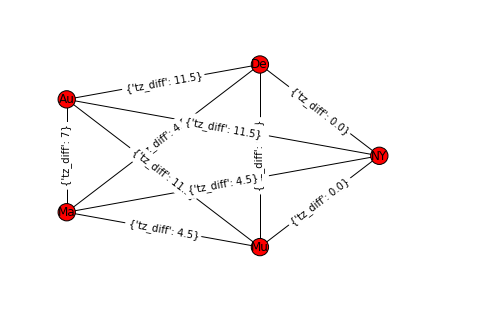

In [28]:
draw_with_edge_labels(G, "tz_diff", 2)

## Reading writing from a file

In [34]:
nx.write_graphml(G, "test.gml")

In [35]:
H = nx.read_graphml("test.gml")

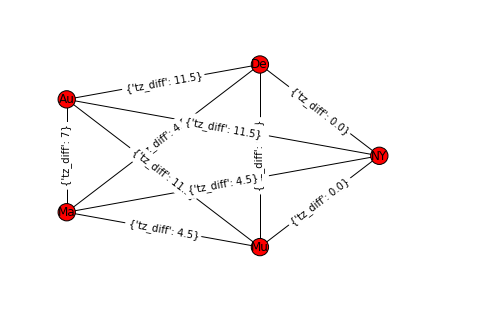

In [36]:
draw_with_edge_labels(H, "tz_diff", 2)